#importing required libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Creating Helper Function

#function to scale the image

In [2]:
def _scale(img):
    new_image = np.zeros((img.shape))
    max_ = img.max()
    min_ = img.min()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_image[i][j] = (img[i][j]-min_)/(max_-min_)*255
    new_image = np.array(new_image, dtype="uint8")
    return new_image

#function to generate homomorphic kernel

In [3]:
def _homomorphic_kernel(row, col, d0,c, gh, gl):
    kernel = np.zeros((row,col))
    for i in range(row):
        for j in range(col):
            kernel[i][j] = np.exp(-((i-row//2)**2+(j-col//2)**2)*c/(d0**2))
            kernel[i][j] =(gh-gl)*(1-kernel[i][j])+gl
    visual_filter = _scale(kernel)
    plt.imshow(visual_filter, "gray")
    plt.show()
    return kernel


#

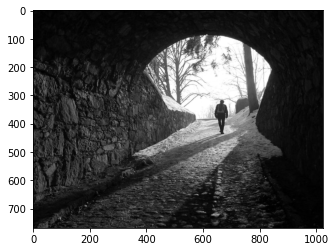

In [4]:
path = "../img/homo_filt.jpg"
inp_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(inp_img, "gray")
plt.show()

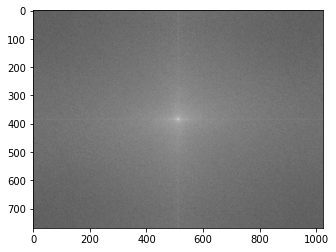

In [5]:
# img = cv2.resize(inp_img, (400,400))
img = inp_img
img = np.log1p(img)
img = np.fft.fft2(img)
img = np.fft.fftshift(img)
magnitude = np.log(np.abs(img))
plt.imshow(magnitude, "gray")
plt.show()

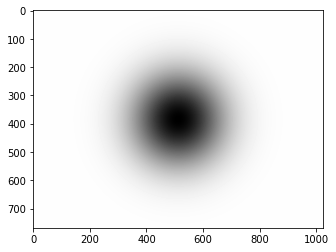

In [6]:
filter = _homomorphic_kernel(img.shape[0], img.shape[1], d0=50, c=0.1,gh=1.2, gl=0.5)

In [7]:
mag = np.abs(img)
ang = np.angle(img)
new_mag = mag*filter
combined = np.multiply(new_mag, np.exp(1j*ang))
output = np.real(np.fft.ifft2(np.fft.ifftshift(combined)))
output = np.exp(output)-1
output = _scale(output)

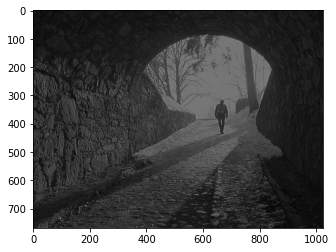

In [8]:
plt.imshow(output, "gray")
plt.show()